In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import PIL
import tensorflow as tf

In [2]:
trainpath="/kaggle/input/brain-tumor-mri-images/archive (5)/Training/"
testpath="/kaggle/input/brain-tumor-mri-images/archive (5)/Testing/"
pred="/kaggle/input/brain-tumor-mri-images/Prediction check images/Prediction check images/Prediction check images/"

In [3]:
os.listdir(trainpath)

['pituitary', 'notumor', 'meningioma', 'glioma']

In [4]:
batch_size = 64
img_h = 224
img_w = 224

In [5]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(trainpath ) : 
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name  Traning Image Numbers
0   pituitary                   1457
1     notumor                   1595
2  meningioma                   1339
3      glioma                   1321


In [6]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(testpath ) : 
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

  Folder_name  Traning Image Numbers
0   pituitary                    300
1     notumor                    405
2  meningioma                    306
3      glioma                    300


In [7]:
Folder_name=[]
folder_item_numbers = []
for folder in  os.listdir(pred ) : 
    files = gb.glob(pathname= str( pred  + folder + '/*.jpg'))
    Folder_name.append(folder)
    folder_item_numbers.append(len(files))
foldernames=pd.DataFrame({'Folder_name':Folder_name})
itemnumbers=pd.DataFrame({'Traning Image Numbers':folder_item_numbers})
informations=pd.concat([foldernames,itemnumbers],axis=1)
print(informations)

        Folder_name  Traning Image Numbers
0       glioma2.jpg                      0
1      no_tumor.jpg                      0
2    pituitary4.jpg                      0
3   meningioma3.jpg                      0
4    pituitary2.jpg                      0
5       glioma3.jpg                      0
6   meningioma2.jpg                      0
7       glioma1.jpg                      0
8    pituitary3.jpg                      0
9    pituitary1.jpg                      0
10       glioma.jpg                      0
11    pituitary.jpg                      0
12      glioma4.jpg                      0
13  meningioma4.jpg                      0
14  meningioma1.jpg                      0
15   meningioma.jpg                      0


In [8]:
#loading data and resize it and collect it in one folder
new_size=224    
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in files: 
        image_class = {'pituitary':0, 'notumor':1, 'meningioma':2, 'glioma':3}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_train.append(resized_image)
        y_train.append(image_class[folder])
    print('image reading ...finished')
print('--------------------------------------------------')        
#check items in X_test
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 

folder name is :  pituitary
numbers of images in folder are :  1457
 start reading images
image reading ...finished
folder name is :  notumor
numbers of images in folder are :  1595
 start reading images
image reading ...finished
folder name is :  meningioma
numbers of images in folder are :  1339
 start reading images
image reading ...finished
folder name is :  glioma
numbers of images in folder are :  1321
 start reading images
image reading ...finished
--------------------------------------------------
items in X_train is:        5712  items
items in y_train is:        5712  items


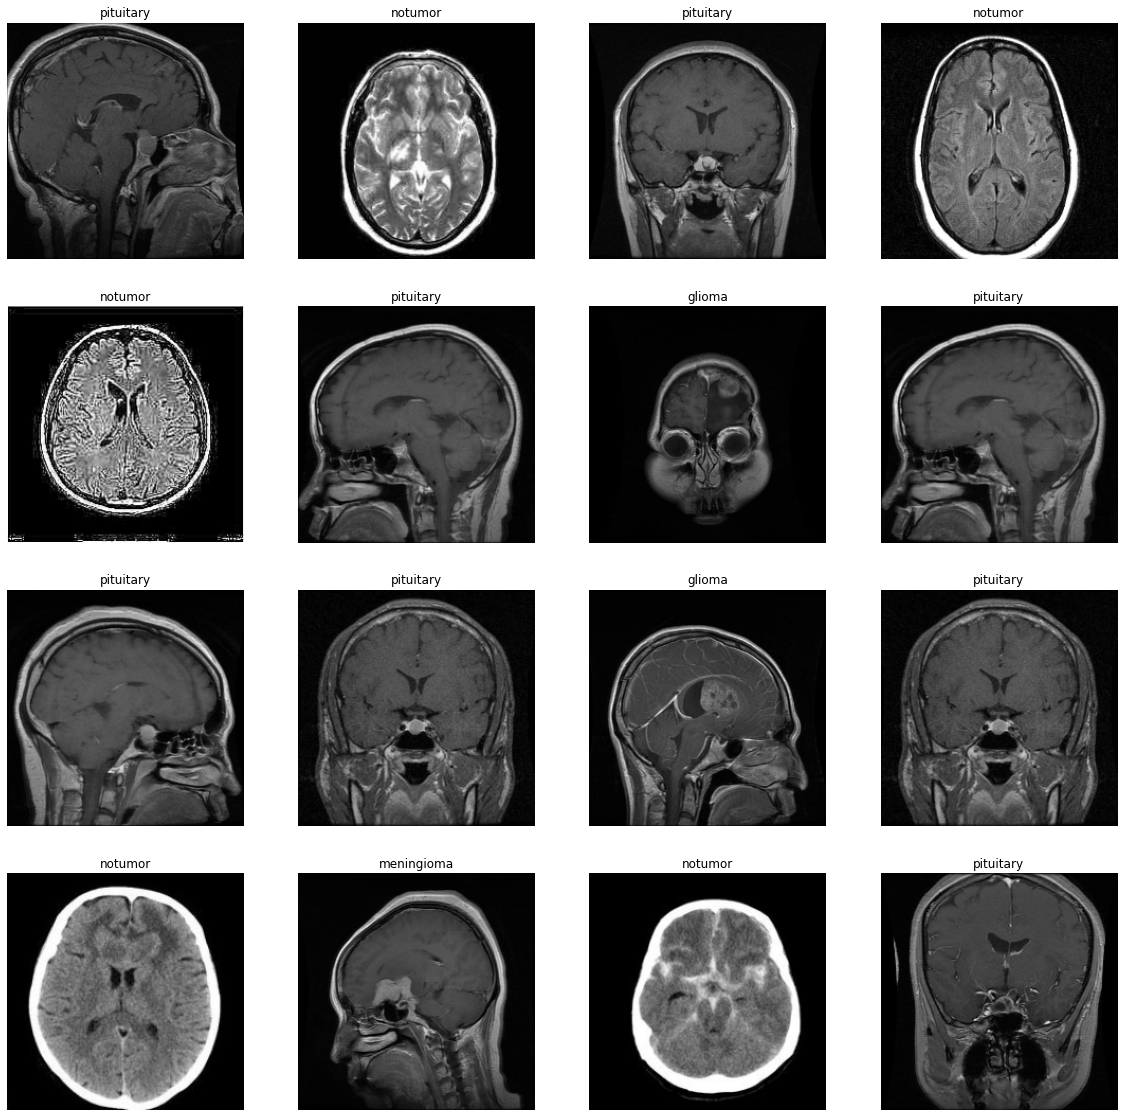

In [9]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train ),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_train [i])   
    plt.axis('off')
    classes  = {'pituitary':0, 'notumor':1, 'meningioma':2, 'glioma':3}

    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_train[i]))

In [10]:
#loading data and resize it and collect it in one folder
new_size=224    
X_test = []
y_test = []
for folder in  os.listdir(testpath ) : 
    print( 'folder name is : ', folder)
    files = gb.glob(pathname= str( testpath  + folder + '/*.jpg'))
    print( 'numbers of images in folder are : ', len(files))
    print(' start reading images')
    for file in files: 
        image_class = {'pituitary':0, 'notumor':1, 'meningioma':2, 'glioma':3}
        orignal_image = cv2.imread(file)
        image = cv2.cvtColor(orignal_image, cv2.COLOR_BGR2RGB)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(image , (new_size,new_size))
        X_test.append(resized_image)
        y_test.append(image_class[folder])
#check items in X_test
print("items in X_test is:       ",len(X_test) , " items") 
print("items in y_test is:       ",len(y_test) , " items") 

folder name is :  pituitary
numbers of images in folder are :  300
 start reading images
folder name is :  notumor
numbers of images in folder are :  405
 start reading images
folder name is :  meningioma
numbers of images in folder are :  306
 start reading images
folder name is :  glioma
numbers of images in folder are :  300
 start reading images
items in X_test is:        1311  items
items in y_test is:        1311  items


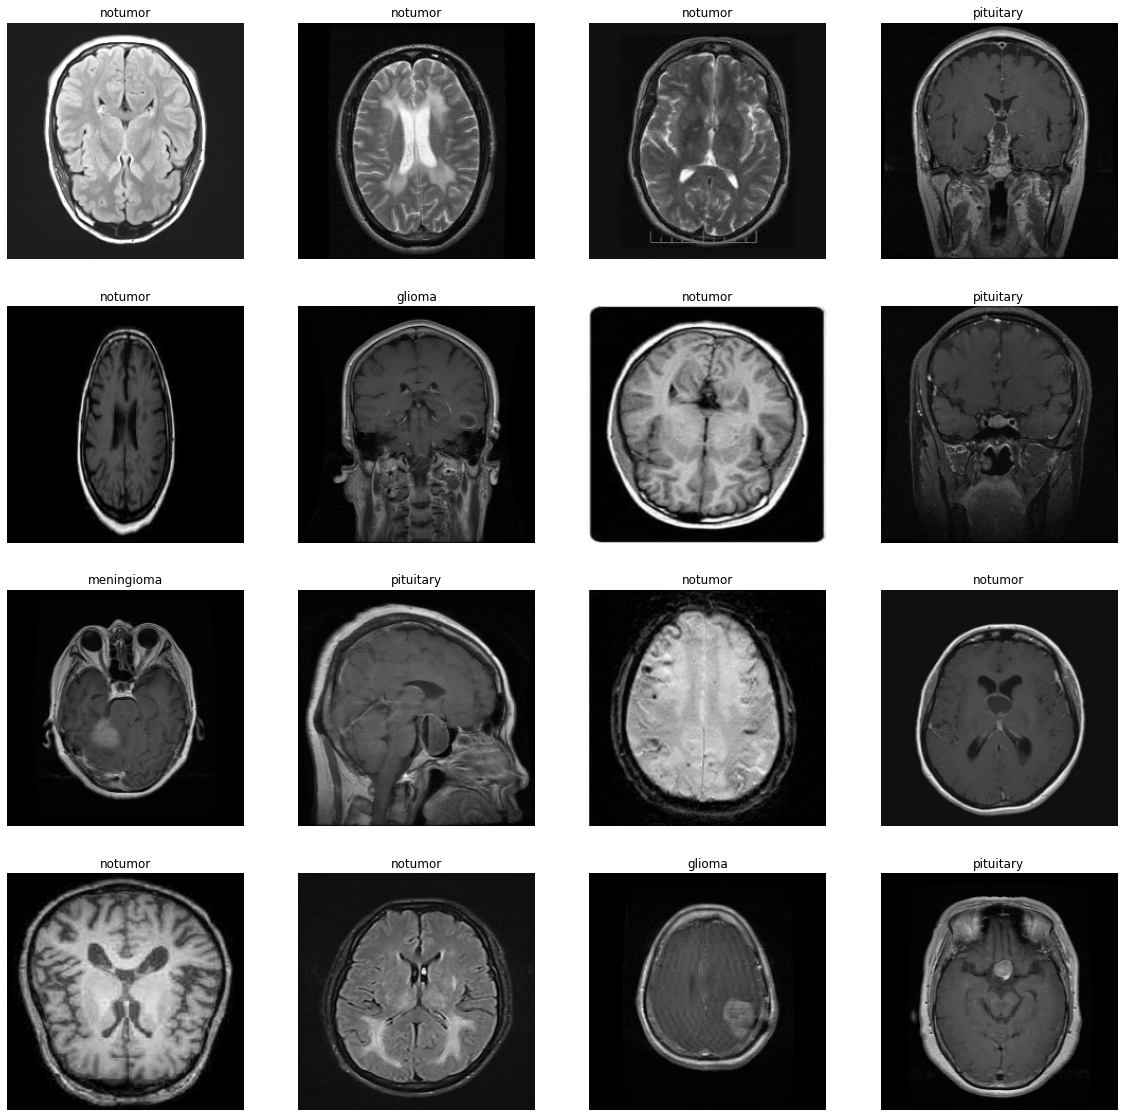

In [11]:
#showing training images with labels
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(X_test[i])   
    plt.axis('off')
    classes ={'pituitary':0, 'notumor':1, 'meningioma':2, 'glioma':3}
    def ImageClass(n):
        for x , y in classes.items():
            if n == y :
                return x
    plt.title(ImageClass(y_test[i]))

In [12]:
x_pred=[]
files=gb.glob(pathname= str( pred + '/*.jpg'))

for file in files:
    imag=cv2.imread(file)
   
    image = cv2.cvtColor(imag, cv2.COLOR_BGR2RGB)

    imagee= cv2.resize(image , (new_size,new_size))

    x_pred.append(list(imagee))
len(x_pred)

16

In [13]:
#converting all TRAIN data to array
X_train = np.array(X_train)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)


X_train shape  : (5712, 224, 224, 3)
y_train shape : (5712,)


In [14]:
#converting all TEST data to array
X_test = np.array(X_test)
y_test = np.array(y_test)
print("X_test shape  :" ,X_test.shape)
print("y_test shape :", y_test.shape)

X_test shape  : (1311, 224, 224, 3)
y_test shape : (1311,)


In [15]:
x_pred = np.array(x_pred)
print("x_pred shape  :" ,x_pred.shape)

x_pred shape  : (16, 224, 224, 3)


In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,SeparableConv2D

In [17]:
from tensorflow.keras.applications.resnet50 import ResNet50
#base_model = ResNet50(include_top=False, input_shape=(224, 224, 3), weights = 'imagenet')
#for layer in base_model.layers:
 #   layer.trainable = False
model = ResNet50(include_top=False, input_shape=(224, 224, 3), weights = 'imagenet')
# mark loaded layers as not trainable
for layer in model.layers[:80]:
    layer.trainable = False

for layer in model.layers[80:]:
    layer.trainable = True

94781440/94765736 [==============================] - 1s 0us/step


In [18]:
x=Flatten()(model.output)

x=Dropout(rate=0.5)(x)

x=Dense(512,activation = "relu")(x)
x=Dropout(rate=0.3)(x)
x=Dropout(rate=0.3)(x)

x=Dense(4, activation='softmax')(x)

model = Model(model.input, x)


In [19]:
opt=tf.keras.optimizers.Adam(0.0001)
#compliling model
#model.compile(optimizer='adam',loss='categorical_crossentropy' , metrics='accuracy')
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy' , metrics='accuracy')

In [20]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, CSVLogger, LearningRateScheduler,TensorBoard

In [21]:
earlystop=EarlyStopping(patience=5)
filepath = "model_class.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')
log_fname = 'model_log.csv'
csv_logger = CSVLogger(filename=log_fname,separator=',',append=False)
callbacks_list = [checkpoint, csv_logger,earlystop] 

In [22]:
X_train.shape,y_train.shape

((5712, 224, 224, 3), (5712,))

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_data_gen  = ImageDataGenerator()
test = test_data_gen.flow(
      X_test,
      y_test,
      shuffle=True, 
      batch_size=batch_size
      )

In [24]:
history= model.fit(X_train,y_train,validation_data=test,epochs=7,verbose=1,batch_size=32,callbacks=[callbacks_list])

Epoch 1/7
179/179 [==============================] - 55s 225ms/step - loss: 0.6357 - accuracy: 0.8881 - val_loss: 0.1673 - val_accuracy: 0.9611

Epoch 00001: val_accuracy improved from -inf to 0.96110, saving model to model_class.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/7
179/179 [==============================] - 38s 214ms/step - loss: 0.0754 - accuracy: 0.9778 - val_loss: 0.1352 - val_accuracy: 0.9741

Epoch 00002: val_accuracy improved from 0.96110 to 0.97407, saving model to model_class.h5
Epoch 3/7
179/179 [==============================] - 40s 225ms/step - loss: 0.0874 - accuracy: 0.9790 - val_loss: 0.0676 - val_accuracy: 0.9809

Epoch 00003: val_accuracy improved from 0.97407 to 0.98093, saving model to model_class.h5
Epoch 4/7
179/179 [==============================] - 39s 219ms/step - loss: 0.0453 - accuracy: 0.9893 - val_loss: 0.1406 - val_accuracy: 0.9619

Epoch 00004: val_accuracy did not improve from 0.98093
Epoch 5/7
179/179 [==============================] - 40s 222ms/step - loss: 0.0321 - accuracy: 0.9921 - val_loss: 0.0475 - val_accuracy: 0.9847

Epoch 00005: val_accuracy improved from 0.98093 to 0.98474, saving model to model_class.h5
Epoch 6/7
179/179 [==============================] - 40s 221ms/step - loss: 0.0196 - accurac

In [25]:
#showing results and model accuracy 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(acc , val_acc)

[0.888130247592926, 0.9777660965919495, 0.9789915680885315, 0.9893207550048828, 0.9921218752861023, 0.993172287940979, 0.9935224056243896] [0.9610983729362488, 0.9740656018257141, 0.9809305667877197, 0.9618611931800842, 0.9847444891929626, 0.9641494750976562, 0.9694889187812805]


In [26]:
from keras.models import load_model

model = load_model('model_class.h5')
metrics = model.evaluate(X_test, y_test)

41/41 [==============================] - 5s 95ms/step - loss: 0.0475 - accuracy: 0.9847


In [27]:
prediction = model.predict(X_test)
prediction.shape

(1311, 4)

In [28]:
prediction = model.predict(x_pred)

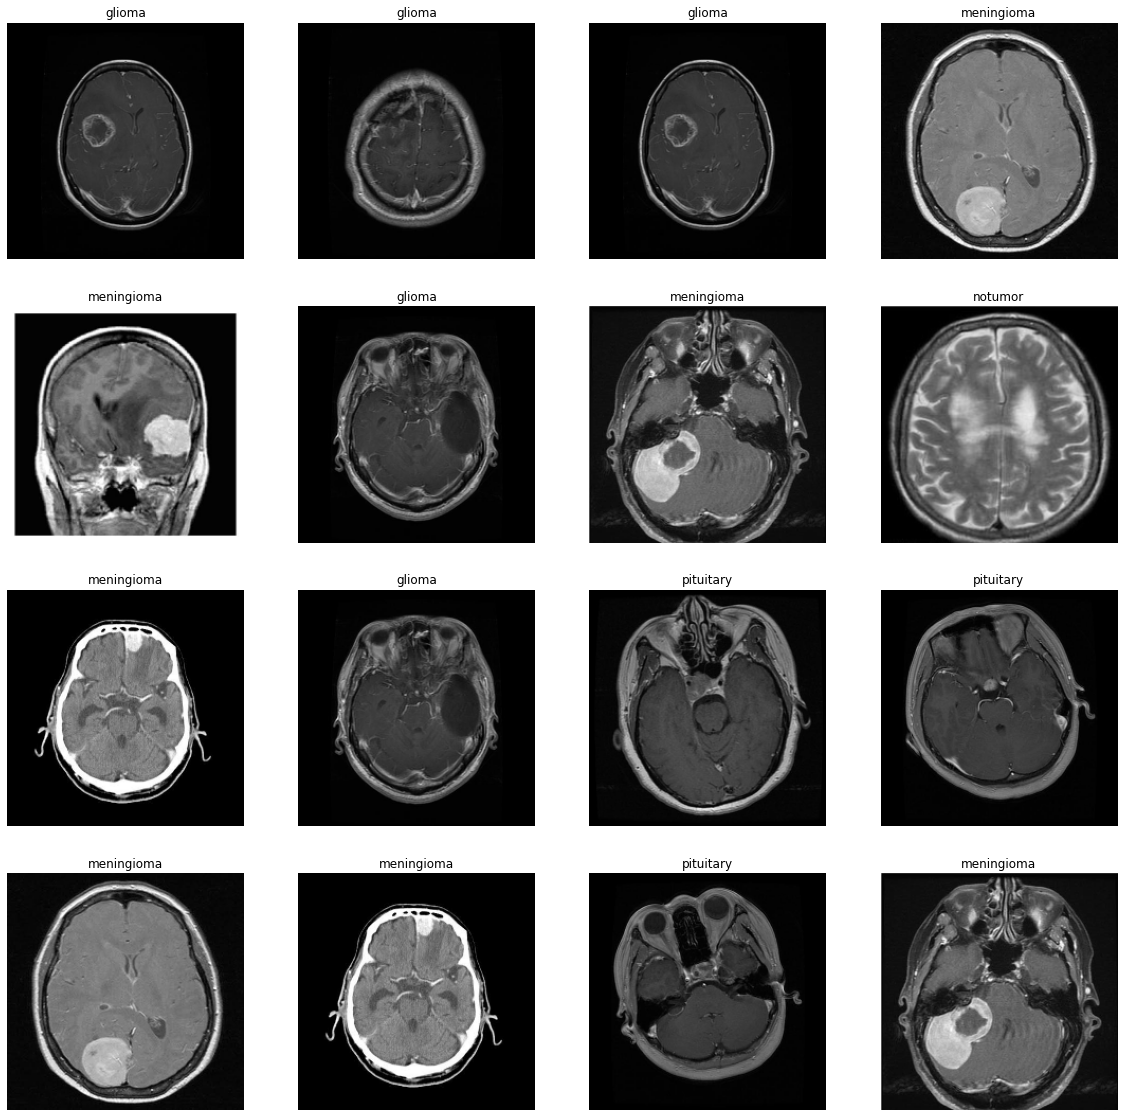

In [29]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_pred),16))) : 
    plt.subplot(4,4,n+1)
    plt.imshow(x_pred[i])
    plt.axis('off')
    plt.title(ImageClass(np.argmax(prediction[i])))

In [30]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

41/41 [==============================] - 4s 95ms/step - loss: 0.0475 - accuracy: 0.9847
Test Loss: 0.04750259593129158
Test Accuracy: 0.9847444891929626


In [31]:
loss, accuracy = model.evaluate(X_train, y_train)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

179/179 [==============================] - 17s 96ms/step - loss: 0.0013 - accuracy: 0.9998
Test Loss: 0.0013333315728232265
Test Accuracy: 0.9998249411582947
